## QQ Plot : 

> a Q–Q plot (quantile-quantile plot) is a probability plot, which is a `graphical method for comparing two probability distributions by plotting their quantiles against each other`.

In [7]:
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')



In [8]:
# lets say this given data : 
data =[ 0.04177737,  0.97977259,  1.19684675,  0.75969411,  0.2772351 ,        1.20400739,  1.19512711, -1.33315966,  0.47241401,  0.58453053,      0.21167461,  0.87106215, -0.56663286,  0.3702523 ,  0.72724427,        0.41126015,  0.33358864,  0.72878097,  0.69929305,  0.72581333,        1.67334826, -1.54572083, -1.22840893,  0.47103287,  0.895276  ,        0.16538052, -0.43575904,  1.62784202,  0.98340417,  0.90482144,      -0.47914975,  0.71812022,  1.14243   , -0.04393411,  1.24946471,       -0.8699551 ,  1.60196517,  1.00140898,  1.48233878, -0.37088602,       -0.0954339 ,  1.2969551 ,  0.0457524 , -0.06486335,  0.43257115,       -0.18945797,  0.46525944,  0.12974487, -0.10501035,  0.94060547,      -1.57714093,  0.24292938,  0.68759359,  0.24113398,  0.74353881,        0.0129037 ,  0.47936105, -0.0596165 ,  0.3300311 , -0.19409805,       -2.15213968, -0.9169724 ,  1.40476752,  0.74067023,  0.36119747,        1.04507563, -0.54692221,  0.65000261,  0.5359208 ,  0.40091749,       0.16959609,  0.43828974,  1.69191812, -0.40588725,  0.52772481,        0.2410331 ,  1.8226663 , -1.36677194,  0.41745297,  0.94050797,
        1.15797033,  0.13883716,  0.9648131 ,  0.71495948,  1.73284151,        0.9571359 ,  0.38785662,  0.41390929, -1.10391874, -0.41368798,      -0.90497721,  1.37201217,  0.52934518,  0.45456489, -0.23302007,        0.1206425 ,  1.43043074,  0.0599792 ,  0.39871742, -0.03524401,       -1.59860382, -1.94105256,  1.22334603, -1.76544176, -0.80324714,        1.16037195,  0.38303564, -0.44427508,  1.13694237,  0.58281873,        1.01938666,  0.85409657,  0.32051415,  0.08834169,  0.15365941,        1.68716621, -0.24197654,  1.2676363 ,  1.48518839, -0.47335603,        1.15654111,  0.76654086, -0.11389136,  1.30586524,  0.32307392,        0.54523295,  0.38590127,  0.50793605, -0.34701396,  0.74541391,        0.79535705,  1.01896308, -0.22023158, -0.48871769,  0.05838767,       -0.25024374,  0.69928181,  2.21454052,  0.20445216,  1.32931331,        0.08653597,  0.07823139,  1.14485681,  0.91738973,  0.0543534 ,       -1.45447157,  1.08313814, -0.27451755,  1.15577356,  1.15404113,       -1.82969195,  0.17610396,  1.08855269,  0.67994842,  0.0750844 ,       -0.30914221,  0.68824746, -2.02655603, -0.65056827,  0.03919982,
        0.06828509,  1.17926148,  0.86701368,  1.45238655,  1.63738079,        0.63609739, -1.31232421,  0.98509236,  1.15594405,  0.20902709,        0.96664264,  0.11769247,  0.48530914,  1.12505311,  0.60806881,       -1.54771281,  0.92716597,  1.16839655, -0.06376581,  0.75839488,        1.05027756,  1.41329557,  0.85657177, -0.2160035 ,  1.12248554,        0.20020919,  1.1861288 ,  0.76429072, -1.83554409, -0.04585441,        1.06873376,  0.10936729,  1.48407643,  0.52580339,  1.19815856,        0.53797982, -0.42615522, -0.38198519,  0.53974062,  0.06254645,        0.11724433,  0.67580552,  0.63406064,  1.03362043, -1.88639841,        0.62474754,  0.89065659,  0.5328413 ,  0.92901562,  0.82901618,       -1.40196713,  0.25330113, -0.11682618,  0.79230788, -1.37307874,        0.37353503,  0.65753252,  0.61958929,  0.95358877, -0.63137426,        0.73935171, -0.3392893 ,  0.90018122,  1.13697138,  1.07777798,       -0.67428172,  1.20112044,  0.13277637,  0.88485663, -0.73037033,        0.73817138,  0.1309939 ,  0.77936817,  1.16422402,  1.22697646,        0.31219482,  0.6517649 ,  1.35374234, -0.11302125,  1.38551431,
        1.4890138 ,  0.75586738,  1.76803848,  0.56651688, -0.67678907,        0.19554616,  0.46406559, -0.06019572,  1.53990381, -1.13432049,       -0.80700753, -2.31246741,  1.33986194,  1.38730476,  0.82881232,        0.70062208, -0.12381894, -0.46690349, -1.57527874,  1.72209985,        0.18183212,  0.8400035 ,  0.418469  ,  1.36179378, -0.92426075,        0.22270703, -0.13774932,  0.93111539, -0.88921133,  1.0997085 ,       -0.9937949 ,  0.38843634,  1.01148004, -0.43816108, -0.95414947,        1.32330751,  0.30404196,  0.88512404,  0.91372546,  0.32134319,        0.14559158, -0.19978188,  0.88329649,  0.30335937,  0.76175674,        0.57364537,  1.02631156,  1.66794999, -1.03792174, -0.31515864,        1.07180383,  0.59720417, -0.32040037, -0.7674771 ,  0.25057312,        0.27762623,  0.54672121, -1.34336276,  0.53814872,  1.24214509,       -1.12005068,  1.37171113,  0.0616415 , -0.74262483,  1.01415696,        0.3901361 ,  0.70918134,  0.20065952,  0.94970448,  0.73886174,        1.06909761,  0.86064287,  1.15752969,  0.82554495,  1.36024967,        0.59598245,  0.89922565,  0.7362065 ,  1.00841732,  0.55340554,
        0.41274327,  0.50711349,  0.45157236, -0.2457261 ,  1.07731295,       -0.50619092,  0.77516586, -2.71031075,  0.69192707,  0.84959366,        1.45540949, -0.44551638,  1.28008884,  0.61377305, -0.54839374,        1.16915428,  1.1075064 ,  1.0229388 ,  1.22989514,  1.24266425,        0.17096114,  1.00952836, -0.28128762, -0.31360414,  0.50315717,        0.23675518, -0.15479312,  0.28744327,  0.66566966, -0.14055415,        0.60945716, -1.45725682, -1.76229852,  0.10049782,  0.59945138,        0.60902798,  0.92513724,  1.3161839 , -0.02831568,  0.53837944,       -3.63123097,  2.24728714,  0.14248232,  1.15824823,  0.1331667 ,        1.30352524,  0.31862759,  1.48258693,  0.82365142,  1.22927344,        0.65581787,  1.49120079,  1.26751206,  0.6596013 , -0.30466474,        0.92502302,  1.05893148,  1.25006908,  1.51266005, -0.36946192,        0.20367163,  1.54883376, -0.07722085,  0.29042734, -0.07913684,        1.0009701 ,  0.66712984,  1.72579542,  1.81505526,  1.02742471,        1.31574026, -1.10915715, -0.54120723,  0.51054351, -0.88139742,       -1.72785233,  1.9585019 ,  1.09644834, -1.27615429, -2.11919702,
        0.10586263,  0.70464499,  0.61638469,  0.30262653, -0.40630085,       -0.2274666 ,  1.20697563,  0.36656195,  0.57455917, -0.95850539,        0.57487625,  0.09909038, -2.02132122,  0.79842403,  0.29482801,       -0.56063591,  1.22430722, -0.26074589, -0.61835677,  0.91307203,        0.98181937,  1.60472708,  0.80975178,  0.57399004,  0.20730555,        1.03604696,  1.99239206,  1.35579176, -1.06755095,  0.79769852,       -0.11886134,  0.92591275,  0.31100381,  1.45719763, -0.18650384,        0.98158411,  0.38823413,  0.03501161,  1.3873394 ,  1.06988861,       -0.61101705,  0.64726664,  0.71829533,  0.37560761,  0.32028192,        0.46012344,  0.92880202,  0.67717555,  0.04629136,  0.47546512,        1.4513086 ,  1.45343272,  1.54991229,  0.62037232,  0.01407354,        0.46979478,  0.05595689, -1.73249288,  0.23003225,  1.29352827,        0.80189453,  1.61966331,  0.69681106,  1.03215339, -1.21549361,        0.93475221,  1.30143537,  0.7254352 ,  0.22841529,  1.50249735,       -0.02415314, -0.18205881,  0.95388083,  0.66182587,  0.08282857,        1.53432986,  1.07818559,  1.04804152,  0.62920033,  0.2221568 ,
        1.11689153,  0.70328342,  1.48907562, -0.85967934,  0.37330663,        0.10042743,  0.43601618, -0.84872277, -0.18902961,  1.16872747,        0.49445364,  0.97912906,  0.16970087,  1.43121388,  0.67825154,        0.8233865 ,  1.20263091,  0.49206124,  0.34548617,  1.58287164]

In [9]:
len(data)

500

In [10]:
X = np.array(data)

In [11]:
X.shape

(500,)

<AxesSubplot:ylabel='Density'>

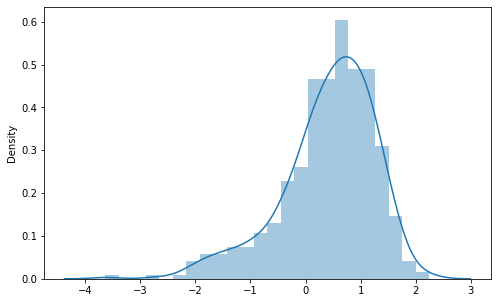

In [12]:
# checking distribution of data  :
plt.figure(figsize=(8,5))
sns.distplot(X)

In [13]:
import statsmodels.api as sm

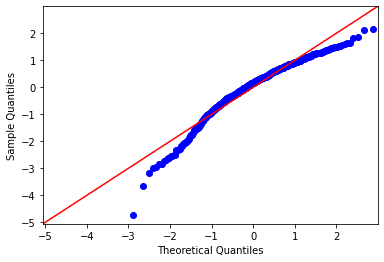

In [14]:
fig = sm.qqplot(X,line="45",fit=True,)


In [15]:
mu = np.mean(X)
s = np.std(X)
print(mu,s)

0.40812679178 0.8571215209422999


In [16]:
# creating normally distributed 500 data points with same above mean and std (for comparision)

Y = stats.norm.rvs(loc = mu, scale = s , size = 500)   #(for theoretical cdf)

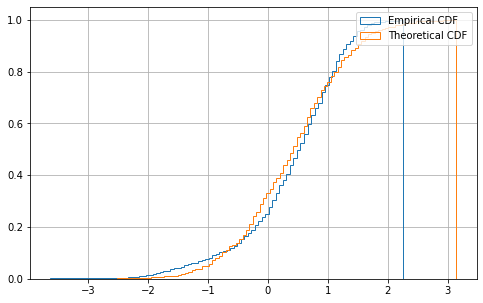

In [17]:
plt.figure(figsize=(8,5))
plt.grid()
plt.hist(X,bins = 100,cumulative=True,density=True,histtype="step", label="Empirical CDF")
plt.hist(Y,bins = 100,cumulative=True,density=True,histtype="step", label="Theoretical CDF")
plt.legend()
plt.show()


In [18]:
# plt.figure(figsize=(8,5))
# plt.grid()
# sns.distplot(X,label = "Emperical pdf")
# sns.distplot(Y,label = "Theoretical pdf")
# plt.legend()
# plt.show()


In [25]:
def QQPlot(data):
    X = np.array(data)
    
    mu = np.mean(X)
    s = np.std(X)
    Y = stats.norm.rvs(loc = mu, scale = s , size = len(X))  
    
    def standardisation_of_data(data):
        data= np.array(data)
        return (data - np.mean(data))/np.std(data)
    
    X = standardisation_of_data(X)
    Y = standardisation_of_data(Y)
    
    def get_percentils(X):
        percentiles = []
        for i in range(1,101):
            percentiles.append(np.percentile(X,i))
        return np.array(percentiles)

    Ax,Ay = get_percentils(X),get_percentils(Y)
    T  = pd.DataFrame([Ax,Ay],index=["Empirical Quantiles","Theoretical Quantiles"]).T
    sns.scatterplot(T["Theoretical Quantiles"],T["Empirical Quantiles"])


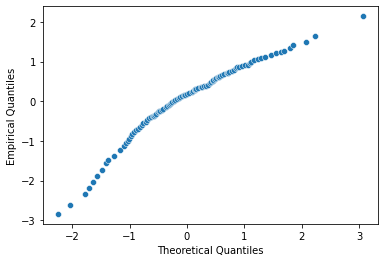

In [26]:
QQPlot(data)

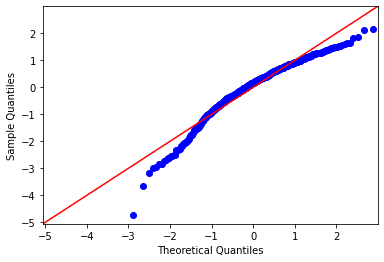

In [27]:
fig = sm.qqplot(X,line="45",fit=True,)


In [28]:
asd = pd.Series(np.random.randint(50,100,520))
asd

0      55
1      79
2      96
3      91
4      89
       ..
515    74
516    95
517    60
518    93
519    85
Length: 520, dtype: int32

In [29]:
asd = pd.Series(np.random.randint(50,100,520))

E = np.array([asd.sample(100,replace=True).mean() for _ in range(100)])

<AxesSubplot:ylabel='Density'>

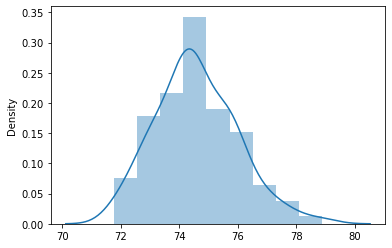

In [30]:
sns.distplot(E)

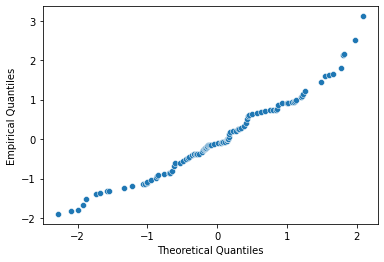

In [31]:
QQPlot(E)

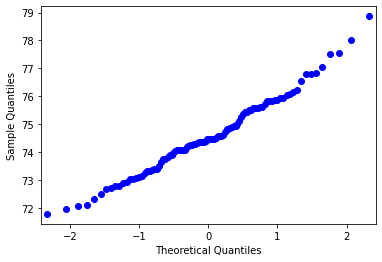

In [32]:
sm.qqplot(E)
plt.show()

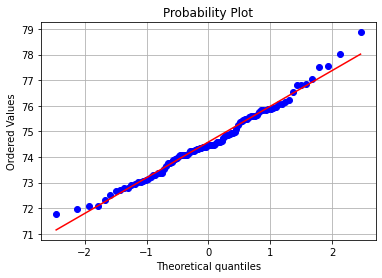

In [33]:
import scipy.stats as stats
stats.probplot(E, dist='norm',  plot=plt)
plt.grid()
plt.show()

In [128]:
X = np.random.randint(150,200,500000)

In [129]:
np.mean(X),np.std(X)

(174.492922, 14.42991593537246)

In [130]:
Y = np.random.normal(np.mean(X),np.std(X),500000 )


In [131]:
Y

array([166.20943972, 183.97567127, 176.64607083, ..., 183.85653589,
       168.36293488, 149.11425665])

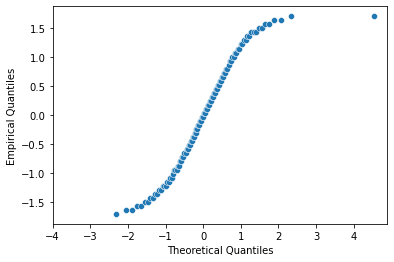

In [135]:

def standardisation_of_data(data):
    data= np.array(data)
    return (data - np.mean(data))/np.std(data)

    
X = standardisation_of_data(X)
Y = standardisation_of_data(Y)
    

def get_percentils(X):
    percentiles = []
    for i in range(1,101):
        percentiles.append(np.percentile(X,i))
    return np.array(percentiles)

Ax= get_percentils(X)
Ay= get_percentils(Y)
T  = pd.DataFrame([Ax,Ay],index=["Empirical Quantiles","Theoretical Quantiles"]).T
sns.scatterplot(T["Theoretical Quantiles"],T["Empirical Quantiles"])
plt.xticks(np.array([-4,-3,-2,-1,0,1,2,3,4]))
plt.show()

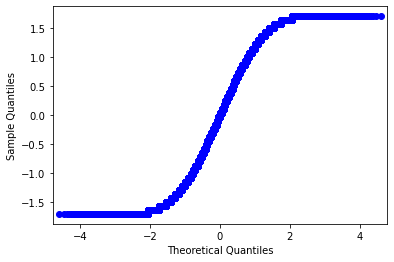

In [40]:
sm.qqplot(X)
plt.show()

In [137]:
data = sns.load_dataset("titanic")["age"]

In [138]:
data = data.dropna()

In [139]:
def QQplot_(data):
    X = np.array(data)

    Y = np.random.normal(np.mean(X),np.std(X),len(X))

    def standardisation_of_data(data):
        data= np.array(data)
        return (data - np.mean(data))/np.std(data)


    X = standardisation_of_data(X)
    Y = standardisation_of_data(Y)


    def get_percentils(X):
        percentiles = []
        for i in range(1,101):
            percentiles.append(np.percentile(X,i))
        return np.array(percentiles)

    Ax= get_percentils(X)
    Ay= get_percentils(Y)
    T  = pd.DataFrame([Ax,Ay],index=["Empirical Quantiles","Theoretical Quantiles"]).T
    sns.scatterplot(T["Theoretical Quantiles"],T["Empirical Quantiles"])
    plt.xticks(np.array([-4,-3,-2,-1,0,1,2,3,4]))
    plt.show()


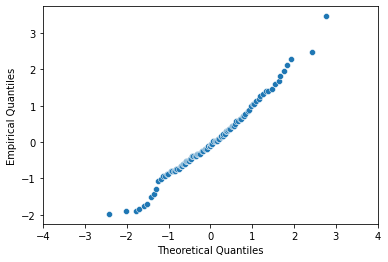

In [140]:
QQplot_(data)

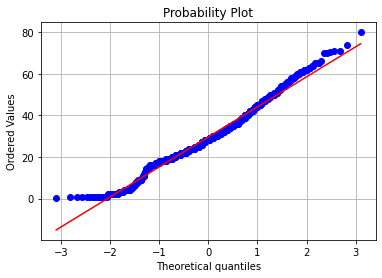

In [142]:
stats.probplot(data, dist='norm',  plot=plt)
plt.grid()
plt.show()

# QQ_plot implementation 

## Gaussian vs Gaussian

In [143]:
x = np.array([11.57784747, 11.2491053 , 13.61389724, 10.43431545, 19.07394786,
        9.82403715, 13.4244426 ,  9.44118008, 14.38563498, 20.18550907,
       19.4045435 , 12.68474753,  8.71613424, 15.37961119, 11.5821208 ,
       13.87797766,  9.49664077, 10.85808951, 14.63660789,  8.03715599,
       13.9350733 ,  9.73475394, 15.88874849, 13.93616509, 13.37910841,
       13.54297006, 12.49945327,  6.52392492,  6.31793451, 14.52702842,
        7.59369013, 11.77629841, 10.45925437, 13.06359334, 13.81378955,
       11.82158292, 16.93834671, 10.48777936, 14.17230283,  6.63886888,
        7.2857522 , 14.62914074, 11.41255324, 14.38723848, 14.80092607,
       10.45656004, 15.31127067, 14.33445367,  9.40400727,  6.36676962,
       14.1418542 , 15.25370069, 12.48852017, 18.07942359, 12.1269647 ,
       12.74866696, 16.74745308, 15.42834694, 12.10071153,  9.87623163,
       12.50152178,  7.62084636, 10.40931342, 10.83547897, 10.2147319 ,
       11.88774592, 15.56120705, 11.4014432 , 12.67275508, 11.25627126,
       14.4804238 , 14.94150826,  8.1418573 ,  9.16408019,  7.71009653,
        9.84448243, 13.7946926 ,  4.65222642, 11.48392034, 11.36194669,
       11.2585006 , 13.59213915, 12.70468726, 16.27678778, 15.30801449,
       19.80718169, 13.96550335,  4.51583695, 12.43701101, 11.50437664,
        4.74791649, 12.16490674, 14.6385116 , 15.85842418, 15.76061832,
       14.14511039, 13.37113669, 11.85226093, 15.79962348,  9.12222972,
       11.60917497,  9.56242753, 13.01923881, 14.36331826,  7.40176422,
       11.81959174, 13.72300771, 15.83969842, 11.57059114,  9.91605704,
       19.34938723,  8.162288  , 10.74142509, 15.63186143, 11.58238432,
        9.89346539,  9.38142614, 12.89340615, 12.96678986,  9.66350771,
       16.99826563,  2.58284943, 12.70393319,  8.06963446,  9.73111822,
       13.38506972, 15.10831298, 15.08498269,  6.92483515,  8.80525993,
       10.390112  , 13.5461753 ,  8.75106316, 11.36924482,  9.69871704,
        9.23275979, 12.43550329, 15.23176802,  9.91491463, 10.95943307,
       11.77935338, 12.02364726, 13.3787093 , 10.75947082, 16.19614796,
       10.92101502,  9.47236272, 13.91946103, 10.62493488, 12.2627494 ,
       16.91801027, 12.71757097, 12.13055668, 16.36272878,  3.03983226,
       14.19186518,  8.08063056,  9.8224435 ,  7.52489477, 11.28703284,
       13.65644155, 14.0003042 , 14.13200882, 17.11634758, 14.96438543,
       15.60263135,  9.27161065, 10.95739162, 11.63160764, 13.23908988,
       10.0719898 ,  9.8796056 , 13.05554173, 14.7211202 , 14.83531548,
       12.41639441, 17.26388048,  7.19055017, 10.74548465, 14.71763177,
        7.48907317, 10.47710346,  9.97995926,  7.6495366 , 16.09693928,
       13.26458585,  9.79034016, 18.74994343, 13.39659268, 14.24175426,
       14.23621363,  6.78345096,  9.15719056, 11.61440847, 16.91722468,
       13.90746381, 12.44531802, 12.62615478, 10.59495711, 10.13040348,
        3.76657486, 15.81098028,  8.93455288, 11.95859969, 15.16344815,
       11.80785278, 11.60122961, 11.99121613, 11.30130027,  9.99075238,
       14.59353462,  9.08941503, 13.52158757, 15.40176301, 13.46787943,
       11.74853818,  5.83513502, 12.15539973, 16.7891168 ,  8.09875172,
       10.6310082 , 10.25618539,  6.21767497, 11.39837608,  9.59825852,
       11.49465916, 14.29015963, 11.48315165, 15.66291869, 15.77957956,
        4.88255399,  9.04458048, 15.62509581, 16.95018948, 13.3775874 ,
       12.88460329, 13.24887651, 13.02214038, 13.8878541 , 15.66745438,
       17.20639472, 11.9222186 ,  8.85100222,  9.95637784, 13.45446542,
       13.54589738, 10.19396684, 10.31850862, 13.65769365, 10.26450834,
       13.03164463, 16.4101971 , 11.89410484, 13.30320091,  9.38985916,
        9.36131454, 14.93142961,  8.37673077, 11.5666218 , 15.51856477,
       16.93052606, 11.46392373, 10.7071838 , 11.03657804,  9.18587141,
       12.66000884,  9.10254542,  9.01776288, 13.90184705, 10.85414438,
       15.81496996, 13.09905247, 10.07405055, 13.55861097, 14.82254442,
       13.25174647,  8.17114623, 11.4953884 ,  8.02098619, 16.40002953,
        9.4421317 , 11.88583757, 13.31227571, 14.95553065, 12.98428806,
       11.1544708 , 13.40493049, 14.68919196, 12.440527  , 14.80701851,
        6.57335148, 13.12571847, 13.82276238, 11.27165485,  9.65698752,
       10.44903102, 10.95038812, 12.44366971,  9.86378511,  8.19112957,
       10.2571676 ,  9.78105677, 11.21610962, 12.20475101, 10.45296661,
       11.36748801, 14.9713108 ,  9.35001919, 15.99673101, 10.01563558,
        9.59455089, 12.56848901,  8.17248203, 13.1895009 , 12.4293327 ,
       13.14075275, 10.86593221, 13.32774828, 11.81153178, 13.90469108,
       11.92063022, 13.71915611, 12.43453495, 15.70137597, 18.45901754,
       14.6197433 ,  9.08884872,  5.15850014, 13.62333839, 11.04689724,
       10.32119393, 17.91836777, 16.12399235, 12.41544643, 10.61299773,
       19.2215383 , 15.18056861, 13.67688575, 11.33347782, 17.25661304,
       15.16867507,  9.40715939, 14.03765542, 15.1503099 , 10.622078  ,
       14.46106249, 11.04414728,  9.4665142 , 11.8714194 , 10.75685762,
       10.77930357, 18.27803743, 13.44076954,  9.09071156, 12.99549238,
       21.08760397,  9.02794452, 10.58456245, 13.02807663, 13.99149013,
       13.69021892, 13.34233145, 18.46203371, 12.09409091, 13.89071504,
        8.04164928, 10.33845976, 15.75377701,  9.89822645, 13.44711474,
       14.3879143 , 17.20070526, 14.29210793, 18.27220542, 13.06642842,
       13.00203395, 12.67410587,  7.12242434, 12.44652844, 10.13101132,
        8.46635559, 11.9721057 , 15.47008364, 10.96698706,  6.05834163,
        9.7531667 , 11.07756905,  9.59407186, 12.87481635, 11.694318  ,
       14.78554439, 22.33221432,  6.84246646, 15.54975901, 11.11097571,
       12.10674748,  9.49406724, 17.01665082, 10.99313794, 10.04778473,
       14.40618557, 11.66664777, 11.98496279,  7.9726323 ,  8.56541709,
       14.52105503, 14.68946799, 12.9448191 , 12.42843901, 16.15789865,
        8.8113074 , 14.6655148 , 11.88793674, 14.76393398, 10.65796408,
       10.66200286, 15.73645844, 12.20152003, 10.00266264, 12.9524175 ,
       10.98355626, 20.35114473, 17.47530313,  9.14644249, 12.39268866,
        9.40639098, 11.04232065, 12.24852286, 12.26360038, 10.87001996,
       11.3733785 , 14.72465634, 13.50317832, 11.93362816,  7.52379566,
       10.4680425 ,  7.8258331 , 11.19155117, 13.65729264,  7.01196691,
       12.93385747, 13.31150831, 12.64664186, 14.78618476,  4.44415109,
       12.81294031, 13.34684482, 12.1277528 ,  8.99405593, 13.46200704,
        6.91128576,  9.35019668,  8.97055521, 11.28466444, 10.64399464,
       12.05216807, 14.59059316, 12.31426901,  9.24310909, 14.54720685,
        6.76053488,  8.09768217, 12.32363793,  9.02387847, 17.0286219 ,
       19.0669372 , 15.84366113,  5.42203737,  9.41875147, 14.37555289,
       11.15951297, 10.28333559, 14.49172936, 17.77046609,  9.16512068,
       16.9575815 , 10.56507815, 13.64254405, 13.08350843, 13.81232518,
       11.11322292,  9.4135368 , 10.26330365,  9.7081287 , 11.41922434,
       13.66072764, 14.0416686 ,  9.661806  , 13.28447577,  9.80461106,
        7.13412165, 10.26586752, 14.90528691, 13.65151123, 11.46129682,
       14.28189362,  9.25854953, 10.40331241, 14.82192117,  9.85303781])

<AxesSubplot:ylabel='Density'>

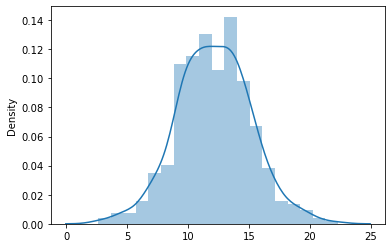

In [144]:
sns.distplot(x)

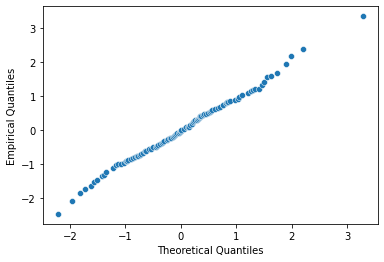

In [145]:
QQPlot(x)

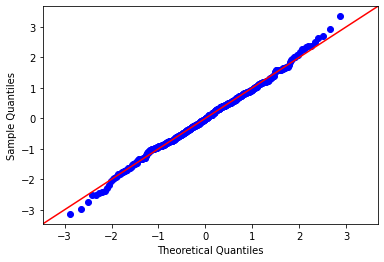

In [146]:
sm.qqplot(x,line= "45", fit = True)
plt.show()

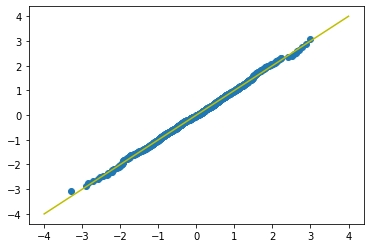

In [147]:
import numpy as np
import pandas as pd
from scipy.special import ndtri # Used to calculate theoretical z values.
import matplotlib.pyplot as plt

data_points = np.random.normal(0, 1, 1000)
df = pd.DataFrame(data_points, columns=["Points"])
df = df.sort_values(by=["Points"], ascending=True).reset_index(drop=True)
df["count"] = df.index + 1
n_rows = df.shape[0]
df["percentile_area"] = (df["count"]) / n_rows
df["z_theortical"] = ndtri(df["percentile_area"])
df["z_actual"] = (df["Points"] - df["Points"].mean()) / df["Points"].std()
plt.scatter(df["z_actual"], df["z_theortical"])
plt.plot([-4,-3,-2,-1,0,1,2,3,4],[-4,-3,-2,-1,0,1,2,3,4],"y")
plt.show()

In [161]:
age_data_titanic=  sns.load_dataset("titanic")["age"]

In [162]:
def QQplot__(data):

    data = data.sort_values(ascending=True).reset_index(drop=True)
    data = data.dropna()
    df = pd.DataFrame(data)
    df["Count"] = df.index+1
    nrow = df.shape[0]
    df["percentile_area"] = df["Count"]/nrow
    df["Z_theoretical"] = norm.ppf(df["percentile_area"])
    df["Z_Emperical"] = (data-data.mean())/data.std()
    
    plt.scatter(df["Z_theoretical"],df["Z_Emperical"],c="c")
    plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2],"b-")
    
    plt.show()


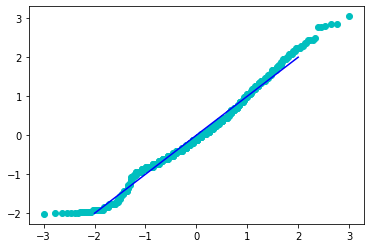

In [163]:
QQplot__(age_data_titanic)

<AxesSubplot:xlabel='age', ylabel='Density'>

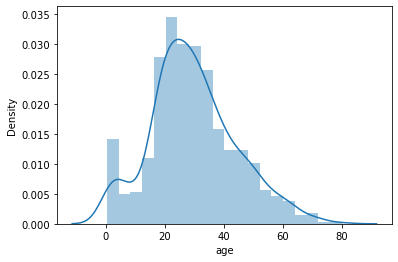

In [164]:
sns.distplot(age_data_titanic)

# steps

In [68]:
data = sns.load_dataset("titanic")["age"]

In [69]:
data

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [70]:
data = data.sort_values(ascending=True).reset_index(drop=True)

In [71]:
data

0      0.42
1      0.67
2      0.75
3      0.75
4      0.83
       ... 
886     NaN
887     NaN
888     NaN
889     NaN
890     NaN
Name: age, Length: 891, dtype: float64

In [72]:
data = data.dropna()


In [73]:
df = pd.DataFrame(data)

In [74]:
df.head()

,age
0,0.42
1,0.67
2,0.75
3,0.75
4,0.83


In [75]:
df["Count"] = df.index+1

In [76]:
df.head()

,age,Count
0,0.42,1
1,0.67,2
2,0.75,3
3,0.75,4
4,0.83,5


In [77]:
nrow = df.shape[0]
nrow

714

In [78]:
df["percentile_area"] = df["Count"]/nrow

In [79]:
df.head()

,age,Count,percentile_area
0,0.42,1,0.001401
1,0.67,2,0.002801
2,0.75,3,0.004202
3,0.75,4,0.005602
4,0.83,5,0.007003


In [80]:
df["Z_theoretical"] = norm.ppf(df["percentile_area"])

In [81]:
df.head()

,age,Count,percentile_area,Z_theoretical
0,0.42,1,0.001401,-2.988760
1,0.67,2,0.002801,-2.770197
2,0.75,3,0.004202,-2.635418
3,0.75,4,0.005602,-2.536256
4,0.83,5,0.007003,-2.457120


In [82]:
df["Z_Emperical"] = (df["age"]-df["age"].mean())/df["age"].std()

In [83]:
df.head()

,age,Count,percentile_area,Z_theoretical,Z_Emperical
0,0.42,1,0.001401,-2.988760,-2.015566
1,0.67,2,0.002801,-2.770197,-1.998356
2,0.75,3,0.004202,-2.635418,-1.992849
3,0.75,4,0.005602,-2.536256,-1.992849
4,0.83,5,0.007003,-2.457120,-1.987342


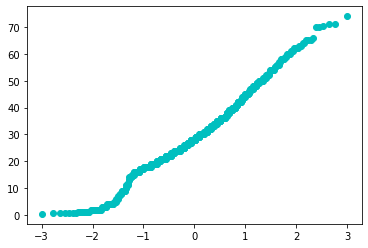

In [87]:
plt.scatter(df["Z_theoretical"],df["age"],c="c")


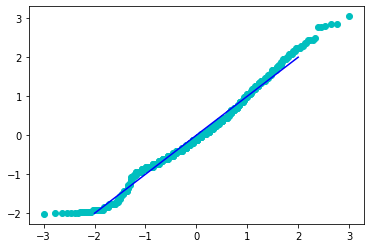

In [85]:
plt.scatter(df["Z_theoretical"],df["Z_Emperical"],c="c")
plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2],"b-")
plt.show()

In [171]:
df.tail()

,Points,count,percentile_area,z_theortical,z_actual
995,2.725759,996,0.996,2.652070,2.685608
996,2.821955,997,0.997,2.747781,2.780807
997,2.925424,998,0.998,2.878162,2.883204
998,3.028240,999,0.999,3.090232,2.984954
999,3.523451,1000,1.000,inf,3.475031


<AxesSubplot:xlabel='z_theortical', ylabel='count'>

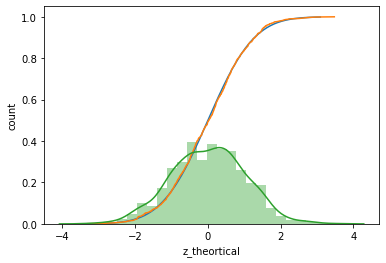

In [182]:
sns.lineplot(x = df["z_theortical"],
            y = (df["count"])/1000)
sns.lineplot(x = df["z_actual"],
            y = (df["count"])/1000)
sns.distplot(x = df["Points"])

## QQ plot between Non Gaussian and Non Gaussian dist : 

In [89]:
from scipy.stats import poisson
x = np.array([ 3,  4,  2,  6,  5,  2,  5,  8,  5,  2,  4,  2,  4,  5,  1,  3,  4,
        3,  4,  4,  2,  3,  4,  3,  5,  5,  2,  5,  6,  3,  6,  3,  1,  3,
        4,  3,  5,  6,  6,  7,  4,  4,  3,  4,  5,  3,  6,  2,  4,  6,  9,
        4,  4,  0,  2,  0,  1,  8,  2,  4,  0,  1,  4,  6,  0,  3,  5,  2,
        3,  4,  6,  8,  7,  6,  3,  2,  4,  1,  3,  5,  3,  4,  4,  7,  4,
        2,  3,  5,  5,  6,  3,  3,  7,  3,  3,  3,  3,  4,  4,  6,  4,  5,
        5,  4,  3,  3,  4,  5,  2,  2,  6,  5,  3,  6,  4,  8,  8,  2,  5,
        3,  5,  3,  5,  0,  6,  3,  5,  4,  7,  7,  2,  2,  4,  4,  3,  4,
        4,  4,  3,  7,  4,  4,  2,  6,  3,  2,  1,  5,  4,  2,  3,  2,  5,
        1,  5,  5,  5,  6,  2,  4,  3,  5,  5,  4,  5,  3,  1,  4,  6,  6,
        4,  1,  5,  3,  0,  3,  2,  5,  1,  4,  6,  4,  3,  6,  5,  1,  4,
        4,  5,  5,  2,  6,  1,  3,  4,  6,  6,  4,  3,  5,  6,  3,  6,  4,
        3,  4,  4,  6,  4,  1,  6,  2,  2,  4,  4,  2,  5,  4,  1,  2,  2,
        4,  3,  4,  7,  8,  2,  2,  1,  6,  2,  8,  4,  5,  4,  6,  3,  4,
        3,  3,  7,  6,  5,  5,  6,  3,  3,  4,  4,  7,  7,  1,  2,  4,  8,
        6,  4,  4,  1,  1,  4,  2,  5,  4,  5,  9,  8,  3,  3,  5,  3,  6,
        5,  6,  1,  5,  2,  9,  5,  2,  5,  7,  3,  6,  8,  5,  5,  5,  6,
        1,  2,  1,  8,  8,  3,  6,  3,  4,  3,  7,  9,  2,  6,  7,  2,  0,
        4,  2,  3,  3,  2,  7,  2,  4,  4,  4,  1,  5,  3,  5,  5,  5,  8,
        0,  4,  2,  4,  1,  2,  3,  3,  5,  3,  2,  3,  2,  6,  2,  4,  3,
        3,  4,  3,  5,  2,  2,  1,  1,  4,  5,  7,  5,  4,  6,  6,  1,  2,
        2,  1,  3,  1,  6,  5,  5,  0,  3,  3,  2,  7,  7,  2,  4,  5,  3,
        3,  6,  6,  6,  1,  3,  7,  1,  5,  4,  5,  6,  4,  3,  4,  4,  5,
        4,  5,  4,  6,  3,  2,  3,  4,  3,  4,  5,  6,  6,  4,  4,  2,  7,
        7,  6,  5,  4,  4,  5,  3,  4,  3,  4,  7,  3,  8,  4,  6,  3,  4,
        3,  3,  6,  5,  5,  2,  6,  4,  3,  7,  4,  4,  2,  4,  8,  3,  3,
        4,  1,  4,  3,  7,  5,  3,  1, 12,  4,  3,  3,  3,  4,  6,  5,  4,
        8,  1,  5,  5,  7,  6,  5,  8,  4,  4,  4,  6,  5,  3,  7,  1,  2,
       10,  1,  5,  2,  2,  3,  2,  3,  8,  5,  4,  4,  4,  7,  5,  6,  4,
        4,  6,  8,  3,  3,  2,  2])

<AxesSubplot:ylabel='Density'>

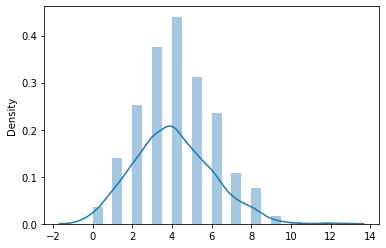

In [90]:
sns.distplot(x)

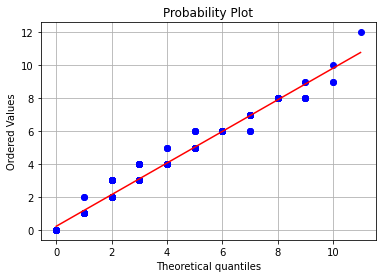

In [91]:
stats.probplot(x,dist="poisson",sparams = (4,), plot = plt)
plt.grid()
plt.show()

In [92]:
# stats.probplot(x,dist="norm",sparams = (0,1), plot = plt)
# plt.grid()
# plt.show()

In [111]:
def QQplot_poisson(data):

    data = data.sort_values(ascending=True).reset_index(drop=True)
    data = data.dropna()
    df = pd.DataFrame(data)
    df["Count"] = df.index+1
    nrow = df.shape[0]
    df["percentile_area"] = df["Count"]/nrow
    df["Z_theoretical"] = poisson.ppf(df["percentile_area"],data.mean())
    df["Z_Emperical"] = (data-data.mean())/data.std()
    
    plt.scatter(df["Z_theoretical"],df["Z_Emperical"],c="c")
    
    plt.show()


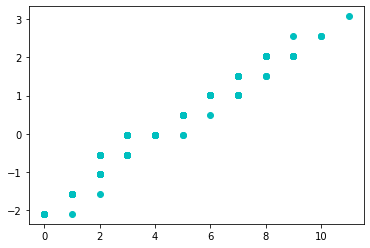

In [112]:
QQplot_poisson(pd.Series(x))

In [100]:
X = pd.Series(x)

In [102]:
data = X.sort_values(ascending=True).reset_index(drop=True)


In [103]:
data = data.dropna()
df = pd.DataFrame(data)
df["Count"] = df.index+1
nrow = df.shape[0]
df["percentile_area"] = df["Count"]/nrow

In [104]:
df

,0,Count,percentile_area
0,0,1,0.002
1,0,2,0.004
2,0,3,0.006
3,0,4,0.008
4,0,5,0.010
...,...,...,...
495,9,496,0.992
496,9,497,0.994
497,9,498,0.996
498,10,499,0.998


In [113]:
df["Z_theoretical"] = poisson.ppf(df["percentile_area"],data.mean())


In [114]:
df

,0,Count,percentile_area,Z_theoretical
0,0,1,0.002,0.0
1,0,2,0.004,0.0
2,0,3,0.006,0.0
3,0,4,0.008,0.0
4,0,5,0.010,0.0
...,...,...,...,...
495,9,496,0.992,10.0
496,9,497,0.994,10.0
497,9,498,0.996,10.0
498,10,499,0.998,11.0


In [121]:
df["Z_Emperical"] = (data-data.mean())/data.std()
    


In [122]:
df

,0,Count,percentile_area,Z_theoretical,Z_Emperical
0,0,1,0.002,0.0,-2.096145
1,0,2,0.004,0.0,-2.096145
2,0,3,0.006,0.0,-2.096145
3,0,4,0.008,0.0,-2.096145
4,0,5,0.010,0.0,-2.096145
...,...,...,...,...,...
495,9,496,0.992,10.0,2.559656
496,9,497,0.994,10.0,2.559656
497,9,498,0.996,10.0,2.559656
498,10,499,0.998,11.0,3.076967


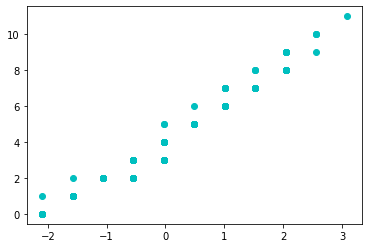

In [123]:
plt.scatter(df["Z_Emperical"],df["Z_theoretical"],c="c")

plt.show()

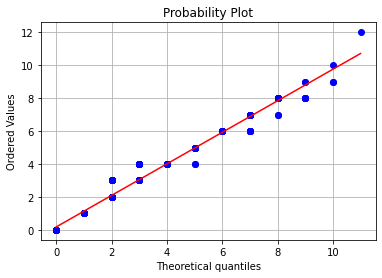

In [126]:
stats.probplot(x,dist="poisson",sparams = (np.mean(x)), plot = plt)
plt.grid()
plt.show()

In [169]:
# if data has outliers : 


In [151]:
X = list(np.random.normal(0,1,100))

In [154]:
X.append(20)

In [156]:
X.insert(0,-7)

In [158]:
X = np.array(X)

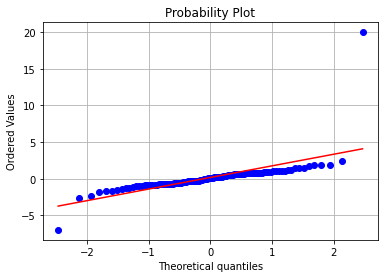

In [159]:
stats.probplot(X,dist="norm", plot = plt,fit=True)
plt.grid()
plt.show()

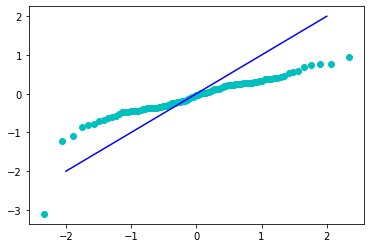

In [166]:
QQplot__(pd.Series(X))

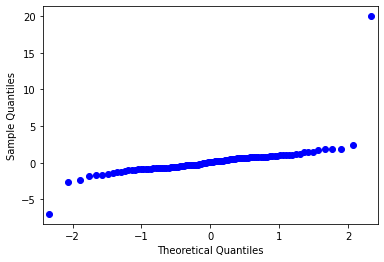

In [168]:
sm.qqplot(X)
plt.show()